In [18]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

Index(['date_of_interest', 'CASE_COUNT', 'PROBABLE_CASE_COUNT', 'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'CASE_COUNT_7DAY_AVG', 'ALL_CASE_COUNT_7DAY_AVG', 'HOSP_COUNT_7DAY_AVG', 'DEATH_COUNT_7DAY_AVG', 'BX_CASE_COUNT', 'BX_PROBABLE_CASE_COUNT', 'BX_HOSPITALIZED_COUNT', 'BX_DEATH_COUNT', 'BX_CASE_COUNT_7DAY_AVG', 'BX_PROBABLE_CASE_COUNT_7DAY_AVG', 'BX_ALL_CASE_COUNT_7DAY_AVG', 'BX_HOSPITALIZED_COUNT_7DAY_AVG', 'BX_DEATH_COUNT_7DAY_AVG', 'BK_CASE_COUNT', 'BK_PROBABLE_CASE_COUNT', 'BK_HOSPITALIZED_COUNT', 'BK_DEATH_COUNT', 'BK_CASE_COUNT_7DAY_AVG', 'BK_PROBABLE_CASE_COUNT_7DAY_AVG', 'BK_ALL_CASE_COUNT_7DAY_AVG', 'BK_HOSPITALIZED_COUNT_7DAY_AVG', 'BK_DEATH_COUNT_7DAY_AVG', 'MN_CASE_COUNT', 'MN_PROBABLE_CASE_COUNT', 'MN_HOSPITALIZED_COUNT', 'MN_DEATH_COUNT', 'MN_CASE_COUNT_7DAY_AVG', 'MN_PROBABLE_CASE_COUNT_7DAY_AVG', 'MN_ALL_CASE_COUNT_7DAY_AVG', 'MN_HOSPITALIZED_COUNT_7DAY_AVG', 'MN_DEATH_COUNT_7DAY_AVG', 'QN_CASE_COUNT', 'QN_PROBABLE_CASE_COUNT', 'QN_HOSPITALIZED_COUNT', 'QN_DEATH_COUNT',
  

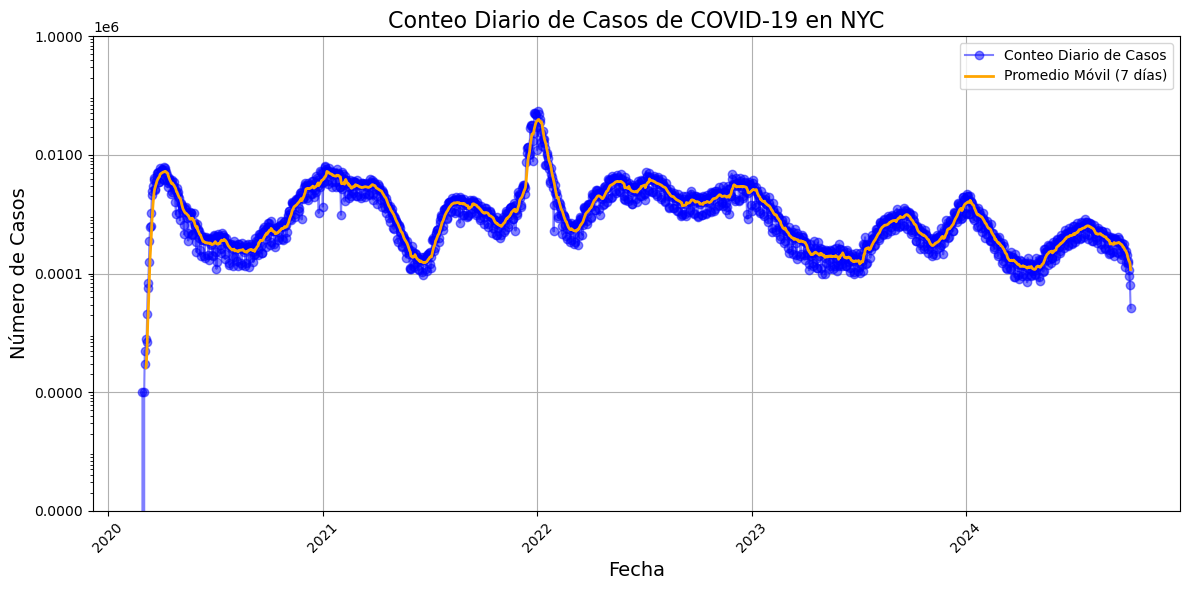

In [46]:
import pandas as pd


# Cargar el dataset
data = pd.read_csv('/Users/cristiangaytan/Downloads/COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths_20241016.csv')

# Verificar las columnas disponibles
print(data.columns)

# Limpiar los datos eliminando registros nulos
data = data.dropna(subset=['date_of_interest', 'CASE_COUNT'])

# Convertir las fechas a formato datetime para manejar fechas correctamente
data['date_of_interest'] = pd.to_datetime(data['date_of_interest'])

# Limpiar la columna CASE_COUNT eliminando comas y convirtiendo a numérico
data['CASE_COUNT'] = data['CASE_COUNT'].str.replace(',', '', regex=False).astype(float)

# Ordenar los datos por fecha
data = data.sort_values(by='date_of_interest')

# Calcular el promedio móvil de 7 días
data['rolling_average'] = data['CASE_COUNT'].rolling(window=7).mean()

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Graficar el conteo diario de casos
plt.plot(data['date_of_interest'], data['CASE_COUNT'], marker='o', linestyle='-', color='blue', alpha=0.5, label='Conteo Diario de Casos')

# Graficar el promedio móvil
plt.plot(data['date_of_interest'], data['rolling_average'], color='orange', label='Promedio Móvil (7 días)', linewidth=2)

# Configurar etiquetas y título
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)
plt.title('Conteo Diario de Casos de COVID-19 en NYC', fontsize=16)

# Usar escala logarítmica para el eje Y
plt.yscale('log')

# Ajustar el espaciado de los ticks en el eje Y
plt.yticks(fontsize=10)  # Ajustar tamaño de los ticks del eje Y
plt.gca().get_yaxis().set_major_formatter(plt.ScalarFormatter())  # Formatear números del eje Y

# Aumentar el espacio entre ticks del eje Y
plt.gca().set_yticks(plt.gca().get_yticks()[::2])  # Muestra cada segundo tick en el eje Y

# Rotar las etiquetas del eje X para evitar que se amontonen
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()


La gráfica resultante muestra el número de casos diarios de COVID-19 en función de la fecha, con puntos individuales representados por marcadores y una línea que conecta estos puntos. También se incluye una línea adicional que muestra el promedio móvil, lo que ayuda a suavizar la variabilidad de los datos diarios y resaltar tendencias generales.

El promedio móvil es una técnica estadística utilizada para suavizar una serie temporal de datos, eliminando fluctuaciones a corto plazo y resaltando tendencias o ciclos más prolongados. Se calcula tomando el promedio de un conjunto de valores en un intervalo de tiempo específico y moviendo ese intervalo a lo largo de la serie de datos.

Para un promedio móvil de 3 días:

Día 3: 
100+120+130/3=116.67

Día 4: 
120+130+150/3=133.33

Día 5: 
130+150+110/3=130.00



In [ ]:
PREDICCION 2025-2026

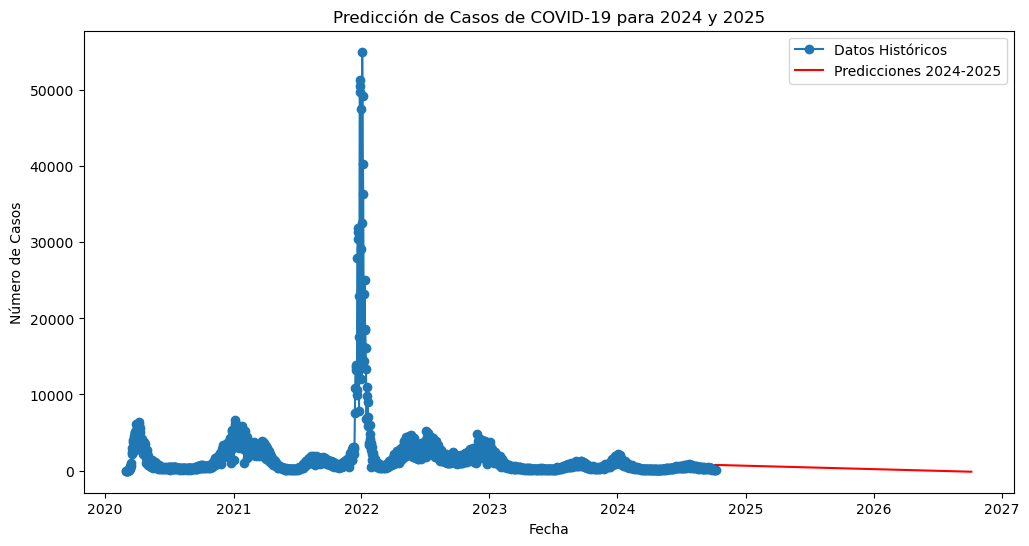

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Cargar el dataset
data = pd.read_csv('/Users/cristiangaytan/Downloads/COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths_20241016.csv')

# Limpiar datos y convertir fechas
data['date_of_interest'] = pd.to_datetime(data['date_of_interest'])
data = data.dropna(subset=['date_of_interest', 'CASE_COUNT'])

# Convertir la columna CASE_COUNT a numérico
data['CASE_COUNT'] = pd.to_numeric(data['CASE_COUNT'].str.replace(',', ''), errors='coerce')

# Eliminar filas con valores NaN en CASE_COUNT después de la conversión
data = data.dropna(subset=['CASE_COUNT'])

# Crear variable de tiempo (X)
data['time'] = np.arange(len(data))

# Definir variables dependiente (Y) e independiente (X)
X = data['time']
Y = data['CASE_COUNT']

# Agregar una constante a X (intercepto)
X = sm.add_constant(X)

# Crear el modelo de regresión
model = sm.OLS(Y, X).fit()

# Realizar pronósticos para 2024 y 2025
future_time = np.arange(len(data), len(data) + 730)  # 730 días (2 años)
future_X = sm.add_constant(future_time)

# Hacer predicciones
predictions = model.predict(future_X)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(data['date_of_interest'], Y, label='Datos Históricos', marker='o')
future_dates = pd.date_range(start=data['date_of_interest'].iloc[-1] + pd.Timedelta(days=1), periods=730)
plt.plot(future_dates, predictions, label='Predicciones 2024-2025', color='red')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Predicción de Casos de COVID-19 para 2024 y 2025')
plt.legend()
plt.show()



HOSPITALIZACIONES

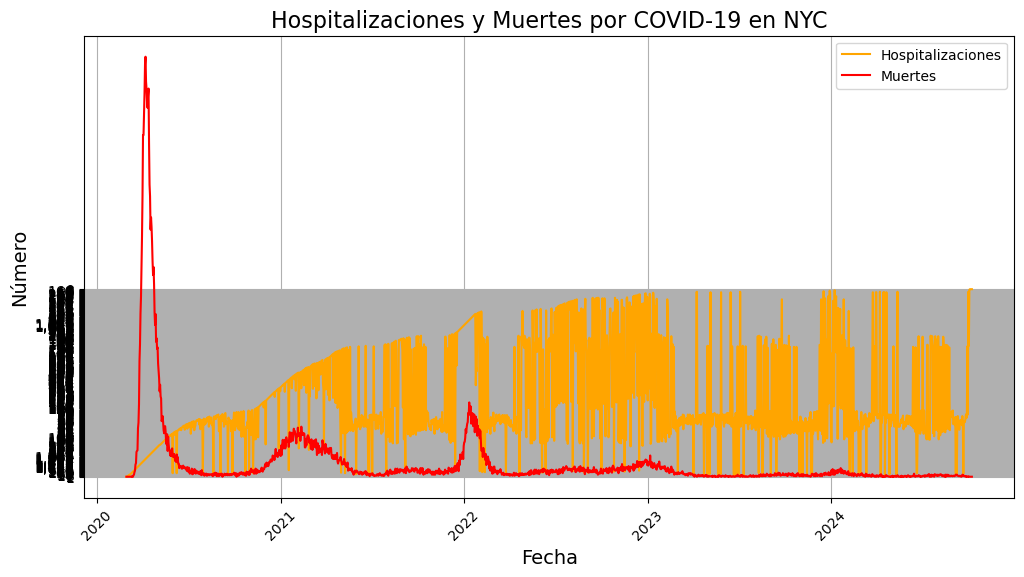

In [52]:
# Supongamos que tienes columnas 'HOSPITALIZATIONS' y 'DEATHS' en tu DataFrame
plt.figure(figsize=(12, 6))
plt.plot(data['date_of_interest'], data['HOSPITALIZED_COUNT'], label='Hospitalizaciones', color='orange', linestyle='-')
plt.plot(data['date_of_interest'], data['DEATH_COUNT'], label='Muertes', color='red', linestyle='-')

# Configurar etiquetas y título
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Número', fontsize=14)
plt.title('Hospitalizaciones y Muertes por COVID-19 en NYC', fontsize=16)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [1]:
pip install prophet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 94.1 kB/s eta 0:00:0000:0100:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 210.2 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 222.0 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1. Preparar los datos para Prophet
data['date_of_interest'] = pd.to_datetime(data['date_of_interest'])
data = data[['date_of_interest', 'HOSPITALIZED_COUNT']]
data.columns = ['ds', 'y']  # Prophet necesita estas columnas

# 2. Entrenar el modelo Prophet
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(data)

# 3. Generar las fechas futuras para 2025 y 2026
future = model.make_future_dataframe(periods=730)  # 2 años adicionales (365*2 días)

# 4. Realizar la predicción
forecast = model.predict(future)

# 5. Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Hospitalizaciones reales', color='orange')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicción', color='blue', linestyle='--')

# Configurar etiquetas y título
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Número de Hospitalizaciones', fontsize=14)
plt.title('Predicción de Hospitalizaciones por COVID-19 en NYC (2025-2026)', fontsize=16)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

NameError: name 'data' is not defined